## Conceptos basicos de estadistica

La distribución de los datos, no podemos conseguir toda la población necesitamos una muestra de los datos
de esta muestra podemos obtener diferentes operaciones, pero será mas fiable la media de las medias
entre más datos recabemos obtenedremos una campana de gauss mucho más estrecha, en donde los datos se acumulan cerca
de la media

## Los contrastes de hipotesis

* ho: hipotesis nula es la hipotesis que nosotros proponemos
* h1: hipotesis secundaria, por si no se da la primera

## Test de la chi cuadrado

hacer una operacion entre lo esperado y lo resultante para ver las diferencias


## correlacion entre variables

* correlacion lineal
* correlacion exponencial

### Coeficiente de correlacion de pearson

* menor de -0.6 cero es no hay correlación
* mayor de 0.6 hay correlación
* correlación cercana a cero es no es buena


Mayor correlación es mayor relacion entre las variables
se pueden ocupar para crear un modelo predictivo

La correlación no implica casualidad

## Ejercicio de correlación

In [1]:
## cargar librerías
import pandas as pd 
import numpy as np

In [34]:
## cargar informacion del dataset
data=pd.read_csv("archivos/ads.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
## integrar formula de correlación a los datos para la television
## como se aleja uno de otro de la correlación de variables que tan lejos está una de otra
data["coorn"]=(data["TV"]-np.mean(data["TV"]))*(data["Sales"]-np.mean(data["Sales"]))
data

,TV,Radio,Newspaper,Sales,corrl,corr2,coorn
0,230.1,37.8,69.2,22.1,46689.486006,59595.795006,670.896956
1,44.5,39.3,45.1,10.4,928.878006,3424.883006,371.460206
2,17.2,45.9,69.3,9.3,10.096506,974.844506,613.181206
3,151.5,41.3,58.5,18.5,18900.063006,27397.698006,19.958456
4,180.8,10.8,58.4,12.9,27814.734506,37955.806506,-37.892794
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,584.551506,2727.189506,699.040956
196,94.2,4.9,8.1,9.7,6428.431506,11712.109506,228.411706
197,177.0,9.3,6.4,12.8,26561.665506,36489.595506,-36.623044
198,283.6,42.0,66.2,25.5,72672.028506,88579.152506,1567.338706


In [20]:
## creamos una columna con el cuadrado de la diferencia entre el promedio de uno y el valor del dato
data["corrl"]=(data["TV"]-data["TV"].mean())**2
data.head(10)

,TV,Radio,Newspaper,Sales,corrl,corr2,coorn
0,230.1,37.8,69.2,22.1,6898.548306,59595.795006,670.896956
1,44.5,39.3,45.1,10.4,10514.964306,3424.883006,371.460206
2,17.2,45.9,69.3,9.3,16859.074806,974.844506,613.181206
3,151.5,41.3,58.5,18.5,19.869306,27397.698006,19.958456
4,180.8,10.8,58.4,12.9,1139.568806,37955.806506,-37.892794
5,8.7,48.9,75.0,7.2,19138.647306,516.312006,943.841706
6,57.5,32.8,23.5,11.8,8017.859306,5115.468006,199.008206
7,120.2,19.6,11.6,13.2,720.519806,18015.679506,22.077956
8,8.6,2.1,1.0,4.8,19166.325806,511.777506,1276.785956
9,199.8,2.6,21.2,10.6,2783.353806,45720.061506,-180.562544


In [24]:
## el cuadrado de la diferncia entre dos variables
data["corr2"]=(data["Sales"]-np.mean(data["Sales"]))**2
data

,TV,Radio,Newspaper,Sales,corrl,corr2,coorn
0,230.1,37.8,69.2,22.1,6898.548306,65.246006,670.896956
1,44.5,39.3,45.1,10.4,10514.964306,13.122506,371.460206
2,17.2,45.9,69.3,9.3,16859.074806,22.302006,613.181206
3,151.5,41.3,58.5,18.5,19.869306,20.048006,19.958456
4,180.8,10.8,58.4,12.9,1139.568806,1.260006,-37.892794
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,11846.689806,41.248506,699.040956
196,94.2,4.9,8.1,9.7,2792.329806,18.684006,228.411706
197,177.0,9.3,6.4,12.8,897.451806,1.494506,-36.623044
198,283.6,42.0,66.2,25.5,18647.950806,131.733006,1567.338706


In [26]:
## obtenemos la correlacion de person
correlacion_person=sum(data["coorn"])/np.sqrt(sum(data["corrl"])*sum(data["corr2"]))

In [28]:
## si existe una correlación, entre más se invierte en television se hacen más ventas
correlacion_person

0.782224424861606

In [32]:
## funcion de correlacion
def correlacion_pearson(dataframe, variableA, variableB):
    corr_per=(dataframe[variableA]-np.mean(dataframe[variableA]))*(dataframe[variableB]-np.mean(dataframe[variableB]))
    corl1=(dataframe[variableA]-np.mean(dataframe[variableA]))**2
    corl2=(dataframe[variableB]-np.mean(dataframe[variableB]))**2
    return sum(corr_per)/np.sqrt(sum(corl1)*sum(corl2))


In [33]:
correlacion_pearson(data, "TV", "Sales")

0.782224424861606

In [35]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [37]:
## obtener las correlaciones de pearson de todas las variables
variable_base="Sales"
for column_name in data.columns.values[data.columns.values!="Sales"]:
    print("variableA: %s variableB: %s correlacion pearson: %s"%(variable_base, column_name, correlacion_pearson(data, variable_base, column_name)))

variableA: Sales variableB: TV correlacion pearson: 0.782224424861606
variableA: Sales variableB: Radio correlacion pearson: 0.5762225745710553
variableA: Sales variableB: Newspaper correlacion pearson: 0.22829902637616525


Text(0.5, 1.0, 'correlacion tv y ventas')

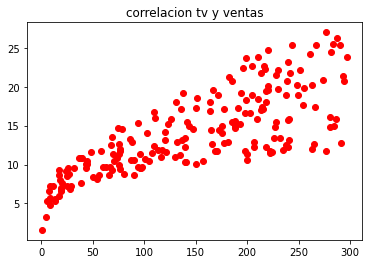

In [41]:
import matplotlib.pyplot as plt
plt.plot(data["TV"], data["Sales"], "ro")
plt.title("correlacion tv y ventas")

Text(0.5, 1.0, 'correlacion radio y ventas')

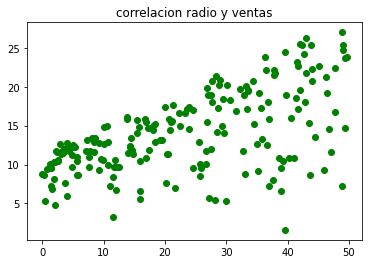

In [48]:
plt.plot(data["Radio"], data["Sales"], "go")
plt.title("correlacion radio y ventas")

Text(0.5, 1.0, 'correlacion Newspaper y ventas')

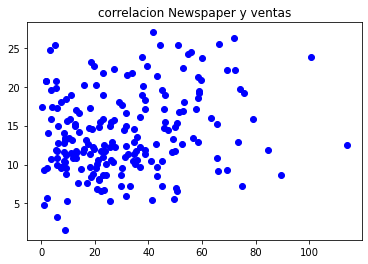

In [47]:
plt.plot(data["Newspaper"], data["Sales"], "bo")
plt.title("correlacion Newspaper y ventas")

In [49]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


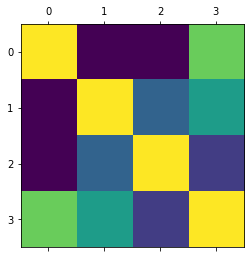

In [50]:
plt.matshow(data.corr())

In [ ]:
## convertir un string en tupla
s=[1,2,3,4
]